**Assignment 2 MTL 782**


*   Aniket Pandey (2021MT60266)
*   Akshat Chaudhary (2021MT60814)
*   Aditya Arya (2021MT60958)










In [ ]:
!pip install scikit-learn

First import all the models that we will train for the MNIST dataset. We also import matplotlib for plotting graphs and we have MinMaxScaler for normalising the data. We have imported cross_val_score for Cross Validation as well.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

2024-04-13 14:15:09.285743: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-13 14:15:09.285856: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-13 14:15:09.570331: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

We first download the MNIST Dataset. This is split into Train Data and Test data already, and we download it as such.

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


We flatten the X pixel matrix into vectors and we normalise the X vector and then we use this modified vector to train our models.

In [ ]:
X_train=X_train.reshape(X_train.shape[0],28*28)
X_test=X_test.reshape(X_test.shape[0],28*28)
X_train=X_train.astype(np.float64)
X_test=X_test.astype(np.float64)
scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**Cross Validation**: We use the k-fold cross validation with k=5. With this, we get the various cross validation scores of the various models. We get that on the MNIST dataset we have in order of better performance:
**Neural Network > KNN > Random Forest > Decision Tree > Naive Bayes**

In [ ]:
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
nb_classifier = GaussianNB()
nb_classifier2= BernoulliNB()
knn_classifier = KNeighborsClassifier()
nn_classifier = MLPClassifier()
classifiers = {
    "Decision Tree": dt_classifier,
    "Random Forest": rf_classifier,
    "Gaussian Naive Bayes": nb_classifier,
    "Bernoulli Naive Bayes": nb_classifier2,
    "KNN": knn_classifier,
    "Neural Network": nn_classifier
}
for name,classifier in classifiers.items():
  scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1_macro')
  print(f"{name} F1 score:", f"{scores.mean():.3f} +/- {scores.std():.3f} ")

Decision Tree F1 score: 0.866 +/- 0.007 
Random Forest F1 score: 0.966 +/- 0.003 
Gaussian Naive Bayes F1 score: 0.515 +/- 0.015 
Bernoulli Naive Bayes F1 score: 0.828 +/- 0.008 
KNN F1 score: 0.969 +/- 0.001 
Neural Network F1 score: 0.974 +/- 0.003 


Next, we have the evaluation block for all these models where we evaluate them on the test set. We have printed the classification report and the confusion Matrix in all these cases. We get the same order of performance as before i.e. **Neural Network > KNN > Random Forest > Decision Tree > Naive Bayes**

Classification report for classifier Decision Tree:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       980
           1       0.95      0.96      0.96      1135
           2       0.87      0.86      0.86      1032
           3       0.84      0.85      0.84      1010
           4       0.88      0.87      0.87       982
           5       0.83      0.83      0.83       892
           6       0.90      0.89      0.89       958
           7       0.91      0.90      0.91      1028
           8       0.82      0.81      0.82       974
           9       0.86      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Confusion matrix:



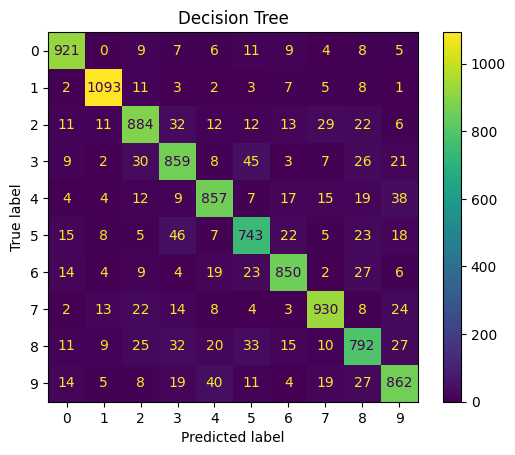

Classification report for classifier Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Confusion matrix:



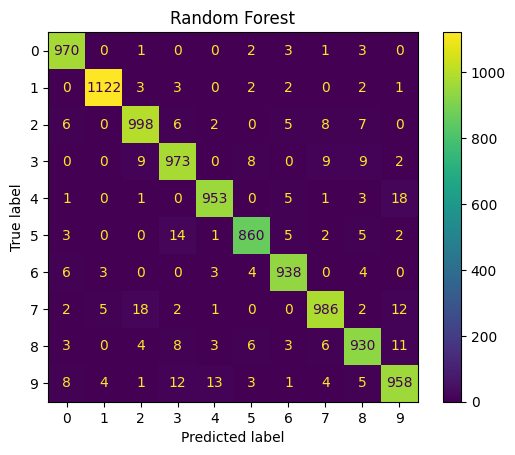

Classification report for classifier Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.34      0.46      1010
           4       0.89      0.17      0.29       982
           5       0.54      0.05      0.09       892
           6       0.66      0.93      0.77       958
           7       0.88      0.27      0.41      1028
           8       0.28      0.68      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.55     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.55      0.52     10000


Confusion matrix:



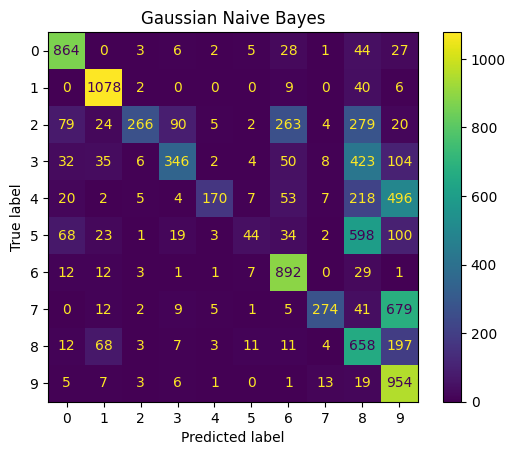

Classification report for classifier Bernoulli Naive Bayes:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       980
           1       0.90      0.96      0.93      1135
           2       0.89      0.83      0.86      1032
           3       0.76      0.84      0.80      1010
           4       0.83      0.81      0.82       982
           5       0.82      0.70      0.76       892
           6       0.89      0.89      0.89       958
           7       0.93      0.85      0.89      1028
           8       0.75      0.78      0.77       974
           9       0.75      0.84      0.79      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000


Confusion matrix:



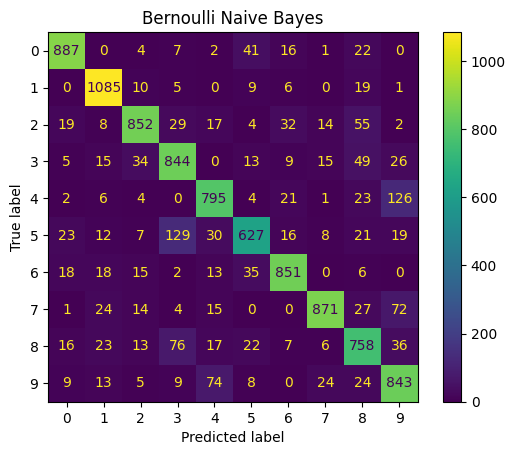

Classification report for classifier KNN:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Confusion matrix:



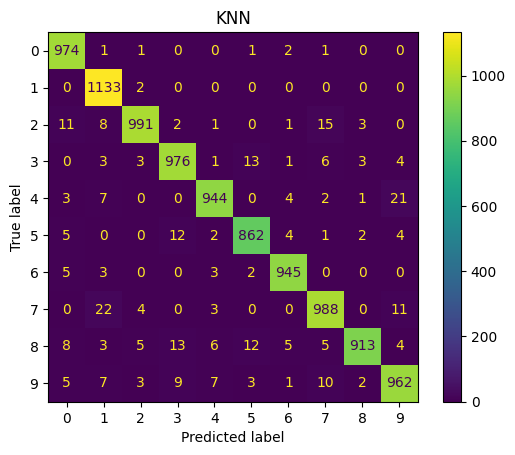

Classification report for classifier Neural Network:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Confusion matrix:



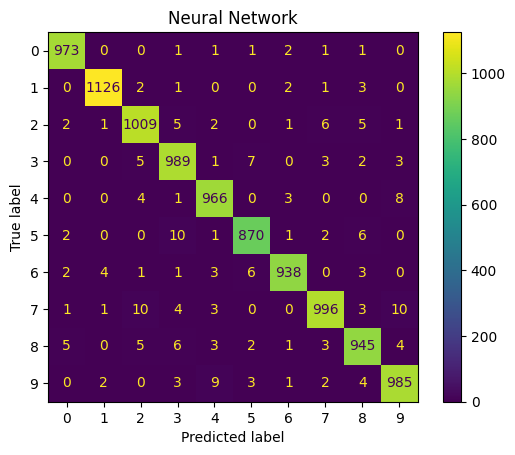

In [ ]:
for name,classifier in classifiers.items():
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  print("Classification report for classifier %s:\n%s\n" % (name, classification_report(y_test, y_pred)))
  print("Confusion matrix:\n")
  conf_matrix = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
  disp.plot()
  plt.title(f"{name}")
  plt.show()

Next we have the Grid Search code blocks for the various models. First up we have the Grid Search for the Neural Network. We obtain:


*   Best hyperparameters: {'alpha': 0.001, 'hidden_layer_sizes': (200, 100)}
*   Best validation score: 0.9799166666666667
*   Test accuracy: 0.9795


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
param_grid = {
    'hidden_layer_sizes': [(100, 50), (200, 100)],
    'alpha': [0.0001, 0.001]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding validation score
print("Best hyperparameters:", grid_search.best_params_)
print("Best validation score:", grid_search.best_score_)

# Evaluate best model on test set
y_pred = grid_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", test_accuracy)

Here is the Grid Search for Decision Tree. We have:


*   Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
*   Best validation score: 0.8687833333333334
*   Test accuracy: 0.8795


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding validation score
print("Best hyperparameters:", grid_search.best_params_)
print("Best validation score:", grid_search.best_score_)

# Evaluate best model on test set
y_pred = grid_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", test_accuracy)

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}

Best validation score: 0.8687833333333334

Test accuracy: 0.8795


Here is the Grid Search for Random Forest. We have:


*   Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1}
*   Best validation score: 0.9664166666666667
*   Test accuracy: 0.9694

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
param_grid = {'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding validation score
print("Best hyperparameters:", grid_search.best_params_)
print("Best validation score:", grid_search.best_score_)

# Evaluate best model on test set
y_pred = grid_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", test_accuracy)

Here is the Grid Search for KNN. We have:


*   Best hyperparameters: {'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}
*   Best validation score: 0.97115
*   Test accuracy: 0.9717

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
param_grid = {'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 20, 30]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding validation score
print("Best hyperparameters:", grid_search.best_params_)
print("Best validation score:", grid_search.best_score_)

# Evaluate best model on test set
y_pred = grid_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", test_accuracy)

Here is the Grid Search for Bernoulli Naive Bayes. We have:


*   Best hyperparameters: {'alpha': 0.1, 'class_prior': None, 'fit_prior': False}
*   Best validation score: 0.8306666666666667
*   Test accuracy: 0.8418

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
param_grid = {'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False],
    'class_prior': [None,
                    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                    [0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.15, 0.15, 0.1]
                   ]
}
# Perform grid search with cross-validation
grid_search = GridSearchCV(BernoulliNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding validation score
print("Best hyperparameters:", grid_search.best_params_)
print("Best validation score:", grid_search.best_score_)

# Evaluate best model on test set
y_pred = grid_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", test_accuracy)

Best hyperparameters: {'alpha': 0.1, 'class_prior': None, 'fit_prior': False}

Best validation score: 0.8306666666666667

Test accuracy: 0.8418


Here is the Grid Search for Gaussian Naive Bayes. We have:


*   Best hyperparameters: {'var_smoothing': 0.01}
*   Best validation score: 0.7784166666666668
*   Test accuracy: 0.7893

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
param_grid = {"var_smoothing":[1e-10,1e-9,0.01,1]
}
# Perform grid search with cross-validation
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding validation score
print("Best hyperparameters:", grid_search.best_params_)
print("Best validation score:", grid_search.best_score_)

# Evaluate best model on test set
y_pred = grid_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", test_accuracy)

Best hyperparameters: {'var_smoothing': 0.01}

Best validation score: 0.7784166666666668

Test accuracy: 0.7893


Next we have the Randomized Search code blocks for the various models. First up we have the Randomized Search for the Neural Network. We obtain:


*   Best hyperparameters: {'alpha': 0.001, 'hidden_layer_sizes': (100,)}
*   Best validation score: 0.99699107142857143


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
param_grid = {'hidden_layer_sizes': [(100,),(100, 50), (200, 100)],
    'alpha': [0.0001, 0.001,0.1]
}
# Perform grid search with cross-validation
random_search = RandomizedSearchCV(MLPClassifier(), param_grid, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding validation score
print("Best hyperparameters:", random_search.best_params_)
print("Best validation score:", random_search.best_score_)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Here is the Randomized Search for Decision Tree. We have:


*   Best hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None}
*   Best validation score: 0.8683499999999998

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
param_grid = {'max_depth': [None, 10, 20, 30],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Perform grid search with cross-validation
random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding validation score
print("Best hyperparameters:", random_search.best_params_)
print("Best validation score:", random_search.best_score_)

Here is the Randomized Search for Random Forest. We have:

*   Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1}
*   Best validation score: 0.9664166666666667

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
param_grid = {'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
# Perform grid search with cross-validation
random_search = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding validation score
print("Best hyperparameters:", random_search.best_params_)
print("Best validation score:", random_search.best_score_)

Here is the Randomized Search for KNN. We have:


*   Best hyperparameters: {'leaf_size': 20, 'n_neighbors': 3, 'weights': 'distance'}
*   Best validation score: 0.9700535714285714

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
param_grid = {'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 20, 30]
}
# Perform grid search with cross-validation
random_search = RandomizedSearchCV(KNeighboursClassifier(), param_grid, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding validation score
print("Best hyperparameters:", random_search.best_params_)
print("Best validation score:", random_search.best_score_)

Here is the Randomized Search for Gaussian NB. We have:


*   Best hyperparameters: {'var_smoothing': 0.01}
*   Best validation score: 0.0.7784166666666668

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
param_grid = {"var_smoothing":[1e-10,1e-9,0.01,1]
}
# Perform grid search with cross-validation
random_search = RandomizedSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding validation score
print("Best hyperparameters:", random_search.best_params_)
print("Best validation score:", random_search.best_score_)

Here is the Randomized Search for Bernoulli NB. We have:


*   Best hyperparameters: {'fit_prior': False, 'class_prior': None, 'alpha': 0.1}
*   Best validation score: 0.8306666666666667

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
param_grid = {'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False],
    'class_prior': [None,
                    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                    [0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.15, 0.15, 0.1]
                   ]
}
# Perform grid search with cross-validation
random_search = RandomizedSearchCV(BernoulliNB(), param_grid, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding validation score
print("Best hyperparameters:", random_search.best_params_)
print("Best validation score:", random_search.best_score_)